In [1]:
import numpy as np
from PIL import Image
import os

class Dataset():
    def __init__(self, root) -> None:
        self.root = root
        # load all image files, sorting them to
        # ensure that they are aligned
        self.images = list(sorted(os.listdir(os.path.join(root, "images"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "masks"))))

    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "images", self.images[idx])
        mask_path = os.path.join(self.root, "masks", self.masks[idx])

        img = np.array(Image.open(img_path))
        mask = np.array(Image.open(mask_path))
        bin_mask = np.array(mask > 0, dtype=np.uint8)

        return img, bin_mask


In [2]:
from matplotlib import pyplot as plt

from skimage.measure import label


In [4]:
dataset = Dataset('../Apple/detection/train/')

In [8]:
def get_bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return rmin, rmax, cmin, cmax

In [41]:
img, mask = dataset[1]
labels = label(label_image=mask, return_num=False, connectivity=2)
boxes = [get_bbox(labels==idx) for idx in range(1,labels.max()+1)]


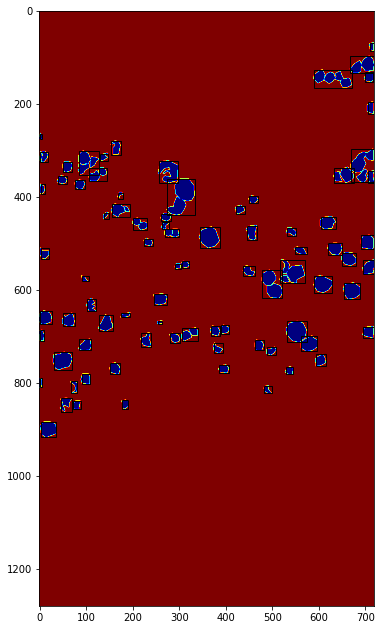

In [42]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

for rmin, rmax, cmin, cmax in boxes:
    ax.add_patch(Rectangle(xy=(cmin, rmin), width=cmax-cmin, height=rmax-rmin, fill=False))

fig.set_figheight(16)

ax.imshow(labels==0, cmap="jet")

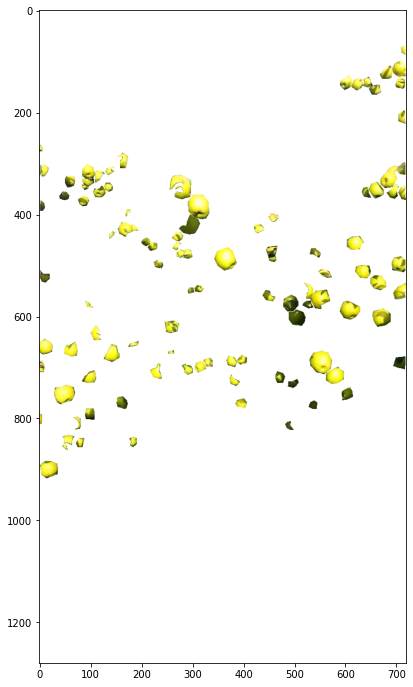

In [43]:
plt.figure(figsize=(12,12))
plt.imshow(np.concatenate([img, 255*mask.reshape(*mask.shape, 1)], axis=-1))